In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
from sympy.solvers import solve

In [80]:
class game:
    def __init__(self,m,g,ev,gamma,n):
        self.n  = n
        self.m  = m
        self.g  = g
        self.ev = ev
        self.gamma = gamma
        self.e_cost = m*g
        self.r_cost = m*gamma
    def utility_of_player(self,k,m):
        sum1 = k/(m+k+1)*(self.ev-self.e_cost-(k-1)*self.r_cost)
        sum2 = (1-k/(m+k+1))*k*self.r_cost
        return sum1-sum2
    def compute_equilibrium(self):
        x = Symbol('x')
        y = Symbol('y')
        f = x/(y+x+1)*(self.ev-self.e_cost-(x-1)*self.r_cost) - (1-x/(y+x+1))*x*self.r_cost
        g = f.diff(x)
        h = g.subs(y,(self.n-1)*x)
        solutions = solve(h, x)
        solution = max(solutions)
        return self.n*solution
        

In [81]:
ev = 10
n  = 6
m  = 0.00000003
g  = 350000
gamma =  35000
G = game(m,g,ev,gamma,n)

In [82]:
G.compute_equilibrium()

7928.20793146342

In [83]:
def f(_ev,n,gamma):
    G = game(m,g,_ev,gamma,n)
    return gamma*G.compute_equilibrium()

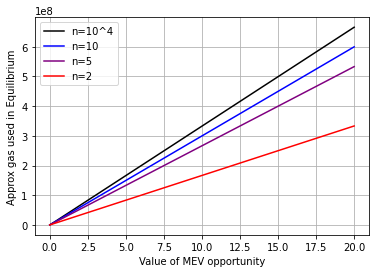

In [90]:
# plotting the function


X1 = np.linspace(0, 20)
f_X1 = [f(y,1000,gamma) for y in Y]
plt.plot(X1,f_X1, color='black', label='n=10^4')


X3 = np.linspace(0, 20)
f_X3 = [f(y,10,gamma) for y in Y] 
plt.plot(X3,f_X3, color='blue', label='n=10')
  

X1 = np.linspace(0, 20)
f_X1 = [f(y,5,gamma) for y in Y]
plt.plot(X1,f_X1, color='purple', label='n=5')


X2 = np.linspace(0, 20)
f_X2 = [f(y,2,gamma) for y in Y] 
plt.plot(X2,f_X2, color='red', label='n=2')
  
# formatting
plt.legend(loc='upper left')
plt.xlabel('Value of MEV opportunity')
plt.ylabel('Approx gas used in Equilibrium')
plt.grid(True)